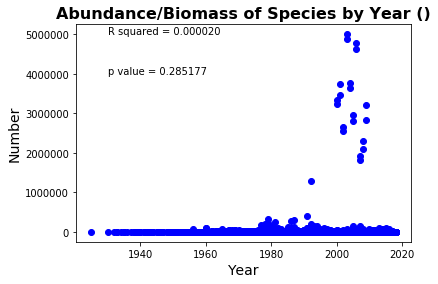

r= -0.004430116266256631
p-value= 0.2851773599607518


LinregressResult(slope=-25.682964123354704, intercept=53475.44040232688, rvalue=-0.004430116266256624, pvalue=0.2851773599537329, stderr=24.030374316516603)

In [112]:
import random as rand
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

##Correlation Analysis##

IABD= pd.read_csv (r'C:\Users\renie\Downloads\InsectChange\InsectAbundanceBiomassData.csv')

IABD_2= IABD.dropna()
##plot ID and number 
x= IABD_2['Year']
y= IABD_2['Number']


plt.plot(x,y,"o", color = 'blue')


plt.xlabel('Year', fontsize= 14)
plt.ylabel('Number', fontsize= 14)
plt.title ('Abundance/Biomass of Species by Year ()', fontsize= 16, fontweight= 'bold')
plt.text(1930, 5000000, ('R squared = %f'% r_value**2), fontsize= 10)
plt.text(1930, 4000000, ('p value = %f'% p_value), fontsize= 10)

plt.show()

stats.pearsonr(x,y)
thistuple = (stats.pearsonr(x,y))

print ("r=", thistuple[0])
print ("p-value=", thistuple[1])

stats.linregress(x,y)







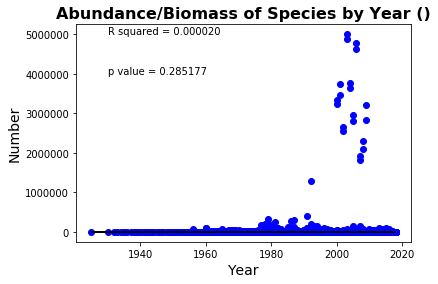

r= -0.004430116266256631
p-value= 0.2851773599607518


LinregressResult(slope=-25.682964123354704, intercept=53475.44040232688, rvalue=-0.004430116266256624, pvalue=0.2851773599537329, stderr=24.030374316516603)

In [113]:
##Regression Analysis
x= IABD_2['Year']
y= IABD_2['Number']


plt.plot(x,y,"o", color = 'blue')
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x + intercept

plt.plot(x,line, color = 'black')
plt.xlabel('Year', fontsize= 14)
plt.ylabel('Number', fontsize= 14)
plt.title ('Abundance/Biomass of Species by Year ()', fontsize= 16, fontweight= 'bold')
plt.text(1930, 5000000, ('R squared = %f'% r_value**2), fontsize= 10)
plt.text(1930, 4000000, ('p value = %f'% p_value), fontsize= 10)

plt.show()

stats.pearsonr(x,y)
thistuple = (stats.pearsonr(x,y))

print ("r=", thistuple[0])
print ("p-value=", thistuple[1])

stats.linregress(x,y)



                count         mean          std  min        25%      50%  \
Stratum                                                                    
Soil surface   5456.0  1336.895031  5165.742438  0.0  28.000000  110.895   
Water         10575.0  1586.423760  4081.126426  0.0  15.714142  306.000   

                  75%       max  
Stratum                          
Soil surface   691.25  148643.0  
Water         1582.65  103549.0  


<BarContainer object of 2 artists>

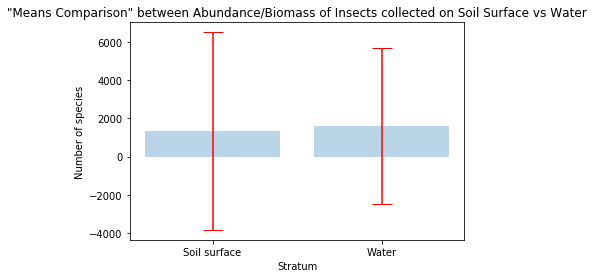

In [114]:
##Means Comparison-- Bar plot w/ error bars
IABDmean= IABD.groupby(["Stratum"])["Number"].describe()
IABDmean2= IABDmean.drop(['Air', 'Herb layer', 'Trees', 'Underground' ])
print(IABDmean2)


x= [1,2]
y= IABDmean2['mean']
error= IABDmean2['std']
xticks_lab = IABDmean2.index

#stats.ttest_ind(IABDmean['Soil surface'], IABDmean['Water'] ) [0]
#this wouldn't work,, guess i can't call it when its a label from a group



plt.xticks(x, xticks_lab)
plt.xlabel ('Stratum')
plt.ylabel ('Number of species')
plt.title ('"Means Comparison" between Abundance/Biomass of Insects collected on Soil Surface vs Water')
#plt.title ('t-test for mean species found in Soil Surface and Water') -- should be t-test,
#but i couldn't do it 


##CI?? 
#SS_95CI = stats.t.interval(alpha=0.95, df=len(IABDmean2(['Soil surface']))-1, loc=IABDmean2(['Soil surface'])_mean, scale=stats.sem(IABDmean2(['Soil surface']))) 
#Water_95CI = stats.t.interval(alpha=0.95, df=len(IABDmean2(['Water']))-1, loc=IABDmean2(['Water'])_mean, scale=stats.sem(IABDmean2(['Water'])))

#hey dr.klemens, i tried to find the CI but I couldn't figure out how to turn this into a list?
#I know a real means comparison should include the t-test and CI as the error bars but I had a hard time trying to get it to work

plt.bar(x,y, yerr= error, alpha =0.3, capsize=10, ecolor= 'red')


#plt.bar(index, means, yerr=CI, capsize =10)
#plt.text(1, 1.0, 't-statistic =' + str(round(twosided.statistic,3)))
#plt.title ('t-test for Exam 1 and Exam 2')



In [115]:
##*Chi-sqaure analysis w/ contingency table w/ results*
IABDC2= np.array([[30,29], [12,12]])
print(IABD2)
IABDC2_df= pd.DataFrame(IABDC2, index= ["BioTIME 63 UK dragonflies", "Tennessee dragonflies"], columns = ["Duration Data Source","# Years Data Collected"])

X=stats.chi2_contingency(IABDC2_df)

#data_df= pd.DataFrame(data, index= ["BioTIME 63 UK dragonflies", "Tennessee dragonflies"])
chi2, p, dof, expected= stats.chi2_contingency(IABDC2_df) 
print('Data')       
print(IABDC2_df)

print('Chi-square results')

print('chi-square = '+ str(round(chi2,4)))
print('p value = '+ str(round(p,4)))
print('degrees of freedom = '+ str(dof))
print('expected values:')
print ()
print(pd. DataFrame(expected, index= ["BioTIME 63 UK dragonflies", "Tennessee dragonflies"], columns = ["Duration Data Source","# Years Data Collected"]))

Data
                           Duration Data Source  # Years Data Collected
BioTIME 63 UK dragonflies                    30                      29
Tennessee dragonflies                        12                      12
Chi-square results
chi-square = 0.0296
p value = 0.8633
degrees of freedom = 1
expected values:

                           Duration Data Source  # Years Data Collected
BioTIME 63 UK dragonflies             29.855422               29.144578
Tennessee dragonflies                 12.144578               11.855422
